## 데이터 불러오고 살펴보기

In [2]:
import numpy as np                 # 수치 계산을 위한 핵심 라이브러리. 다차원 배열(ndarray)과 고속 연산 기능을 제공함.
import pandas as pd                # 데이터 분석 및 처리 라이브러리. CSV, Excel 등 파일을 불러와 DataFrame 형태로 다룰 수 있음.
import matplotlib.pyplot as plt    # 파이썬 기본 시각화 도구. 다양한 차트(선, 막대, 산점도 등)를 생성할 수 있음.
import seaborn as sns              # matplotlib을 기반으로 만들어진 시각화 라이브러리. 통계적 데이터 시각화에 특화되어 있으며, 디자인이 더 세련됨.

# Jupyter Notebook에서 시각화 결과(그래프)를 노트북 셀 내부에 바로 표시하기 위한 매직 명령어.
# 이 설정이 없으면 그래프가 별도의 팝업 창에 뜨거나 표시되지 않을 수 있음.
%matplotlib inline

# Titanic 데이터셋 불러오기. 현재 디렉터리(./)에 있는 'titanic_train.csv' 파일을 읽어서 DataFrame으로 저장.
titanic_df = pd.read_csv('./titanic_train.csv')

# DataFrame의 상위 3개 행을 출력하여 데이터의 전체적인 구조와 컬럼을 미리 확인.
titanic_df.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


---

## DataFrame의 전체적인 정보(컬럼 이름, 데이터 타입, Null 값 개수, 메모리 사용량 등)를 출력
데이터셋의 기본 구조와 결측치 존재 여부를 파악할 때 매우 유용함

In [3]:

print('\n ### train 데이터 정보 ###  \n')

# info() 메서드는 DataFrame의 구조 요약을 보여줌.
# 출력 예시는 아래와 같음 (Kaggle Titanic 학습용 train.csv 기준):
# <class 'pandas.core.frame.DataFrame'>
# RangeIndex: 891 entries, 0 to 890   → 총 891개의 행(샘플)
# Data columns (total 12 columns):    → 열(컬럼) 수: 12개
#  #   Column     Non-Null Count  Dtype  → 각 열의 이름, 결측치가 아닌 값의 개수, 데이터 타입
# ---  ------     --------------  -----
#  0   PassengerId 891 non-null   int64   → 승객 고유 ID (정수)
#  1   Survived    891 non-null   int64   → 생존 여부 (0=사망, 1=생존)
#  2   Pclass      891 non-null   int64   → 좌석 등급 (1, 2, 3)
#  3   Name        891 non-null   object  → 승객 이름 (문자열)
#  4   Sex         891 non-null   object  → 성별 (문자열)
#  5   Age         714 non-null   float64 → 나이 (일부 결측치 존재)
#  6   SibSp       891 non-null   int64   → 함께 탑승한 형제/배우자 수
#  7   Parch       891 non-null   int64   → 함께 탑승한 부모/자녀 수
#  8   Ticket      891 non-null   object  → 티켓 번호 (문자열)
#  9   Fare        891 non-null   float64 → 운임 요금
# 10   Cabin       204 non-null   object  → 객실 번호 (결측치가 많음)
# 11   Embarked    889 non-null   object  → 탑승 항구 (C = Cherbourg, Q = Queenstown, S = Southampton)
# dtypes: float64(2), int64(5), object(5)
# memory usage: 83.7+ KB
# → 이 결과를 통해 데이터의 크기, 결측치 존재 여부, 각 열의 데이터 타입을 한눈에 확인할 수 있음.

titanic_df.info()  


 ### train 데이터 정보 ###  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


---

## 결측치 처리

In [5]:
# Age 컬럼의 결측치를 평균(mean) 값으로 대체.
# inplace=True 옵션은 원본 DataFrame에 바로 적용되도록 함.
titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)


# Cabin 컬럼의 결측치를 'N'이라는 값으로 대체.
# Cabin은 결측치가 매우 많으므로, 단순히 'N'(None 혹은 Unknown의 의미)으로 채움.
titanic_df['Cabin'].fillna('N', inplace=True)


# Embarked(탑승 항구) 컬럼의 결측치를 'N'으로 대체.
# 실제 항구명(C, Q, S) 대신 'N'을 넣어 결측치를 구분 가능하게 유지.
titanic_df['Embarked'].fillna('N', inplace=True)


# 전체 DataFrame에서 아직도 남아 있는 Null 값의 총 개수를 확인.
# isnull().sum()은 각 컬럼별 결측치 개수를 반환 → 다시 .sum()을 붙여 전체 합계를 계산.
print('데이터 세트 Null 값 갯수 ', titanic_df.isnull().sum().sum()) # 0이 나오면 모든 결측치가 처리된 것임.

데이터 세트 Null 값 갯수  0


/tmp/ipykernel_9974/1652184601.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_df['Age'].fillna(titanic_df['Age'].mean(), inplace=True)
/tmp/ipykernel_9974/1652184601.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inpl

In [9]:
# Age 컬럼 결측치를 평균값으로 대체
titanic_df['Age'] = titanic_df['Age'].fillna(titanic_df['Age'].mean())

# Cabin 컬럼 결측치를 'N'으로 대체
titanic_df['Cabin'] = titanic_df['Cabin'].fillna('N')

# Embarked 컬럼 결측치를 'N'으로 대체
titanic_df['Embarked'] = titanic_df['Embarked'].fillna('N')

# 전체 Null 값 확인
print('데이터 세트 Null 값 갯수:', titanic_df.isnull().sum().sum())

데이터 세트 Null 값 갯수: 0


In [10]:
titanic_df.info()  

# 결측치가 모두 채워진것을 확인할 수 있음

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          891 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        891 non-null    object 
 11  Embarked     891 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [11]:
# 'Sex' 컬럼에 있는 값들의 분포를 확인.
# value_counts() 함수는 해당 컬럼에 존재하는 고유 값(unique value)별로 몇 번 등장했는지를 세어 Series 형태로 반환.
# 예를 들어, 남성('male')이 몇 명, 여성('female')이 몇 명인지 확인할 수 있음.
print(' Sex 값 분포 :\n', titanic_df['Sex'].value_counts()) 

# 'Cabin' 컬럼에 있는 값들의 분포를 확인.
# 탑승객의 객실 번호 정보를 담고 있으며, 결측치(NaN)도 있을 수 있음.
# value_counts()를 사용하면 어떤 객실이 몇 명의 승객을 가졌는지 쉽게 파악 가능.
print('\n Cabin 값 분포 :\n', titanic_df['Cabin'].value_counts())

# 'Embarked' 컬럼에 있는 값들의 분포를 확인.
# 승객이 어느 항구에서 탑승했는지 나타내는 정보(S = Southampton, C = Cherbourg, Q = Queenstown).
# value_counts()로 각 항구에서 몇 명이 탑승했는지 확인 가능.
print('\n Embarked 값 분포 :\n', titanic_df['Embarked'].value_counts())


 Sex 값 분포 :
 Sex
male      577
female    314
Name: count, dtype: int64

 Cabin 값 분포 :
 Cabin
N              687
G6               4
C23 C25 C27      4
B96 B98          4
F2               3
              ... 
E17              1
A24              1
C50              1
B42              1
C148             1
Name: count, Length: 148, dtype: int64

 Embarked 값 분포 :
 Embarked
S    644
C    168
Q     77
N      2
Name: count, dtype: int64


In [12]:
# 'Cabin' 컬럼의 값들은 일반적으로 "객실번호" 형태로 되어 있음.
# 예: 'C123', 'E45', 'B101' 등
# 각 승객의 선실 등급을 나타내는 것은 객실 번호의 첫 글자(알파벳)임.
# A, B, C, D, E, F, G 등은 서로 다른 선실 구역을 의미.

# str[:1] : 문자열의 슬라이싱(slicing) 기능을 사용.
# 각 문자열의 처음 한 글자만 추출함.
# 예: 'C123' → 'C', 'E45' → 'E', 'B101' → 'B'

titanic_df['Cabin'] = titanic_df['Cabin'].str[:1]  
# 이렇게 하면 Cabin 컬럼에는 'C123' 같은 전체 번호 대신 'C', 'E', 'B' 등 선실 등급 정보만 남게 됨

print(titanic_df['Cabin'])  
# 변경된 Cabin 컬럼 출력
# 이제 각 값은 해당 승객이 어떤 선실 등급(A~G)인지 나타내는 알파벳만 포함

0      N
1      C
2      N
3      C
4      N
      ..
886    N
887    B
888    N
889    C
890    N
Name: Cabin, Length: 891, dtype: object


In [21]:
# titanic_df.groupby(['Sex','Survived']) 
# → DataFrame을 'Sex'와 'Survived' 두 개의 컬럼 기준으로 **그룹화**.
# 예: 남성/여성(Sex) × 생존 여부(Survived 0,1) 조합별로 그룹을 나눔.
# 결과는 GroupBy 객체가 생성됨.

# ['Survived'] 
# → 그룹화된 각 그룹에서 'Survived' 컬럼만 선택.
# 여기서는 'Survived' 컬럼의 개수를 세기 위해 선택한 것.

# .count() 
# → 각 그룹에 속한 행(row)의 개수를 계산.
# 즉, 남성 중 사망자 수, 남성 중 생존자 수, 여성 중 사망자 수, 여성 중 생존자 수를 계산.

titanic_df.groupby(['Sex','Survived'])['Survived'].count()
# 최종 결과는 Series 형태로 반환됨.
# MultiIndex를 가지며, 예시:
# Sex     Survived
# female  0           81
#         1          233
# male    0          468
#         1          109
# Name: Survived, dtype: int64
# → 각 성별/생존 조합별 승객 수를 보여줌.


Sex     Survived
female  0            81
        1           233
male    0           468
        1           109
Name: Survived, dtype: int64

![groupby](img/groupby.jpg)

<Axes: xlabel='Sex', ylabel='Survived'>

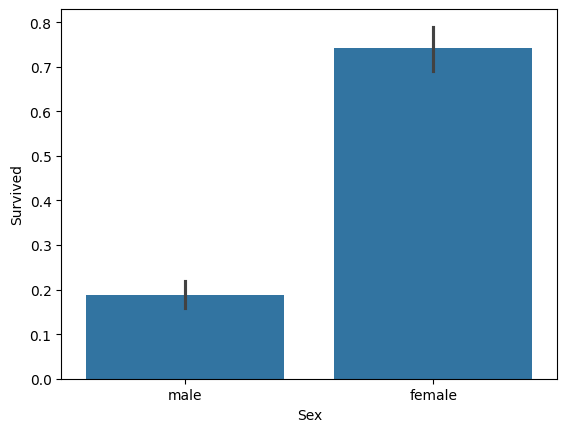

In [23]:
# Seaborn의 barplot을 사용하여 성별에 따른 생존률 시각화
# x축: 'Sex' 컬럼 (male, female)
# y축: 'Survived' 컬럼 (0=사망, 1=생존)
# data: 시각화할 DataFrame 지정
# 각 막대는 해당 성별 승객의 Survived 평균값을 나타냄 → 생존률
sns.barplot(
    x='Sex',        # x축: 성별
    y='Survived',   # y축: 생존 여부 평균(생존률)
    data=titanic_df # 사용 데이터
)

<Axes: xlabel='Pclass', ylabel='Survived'>

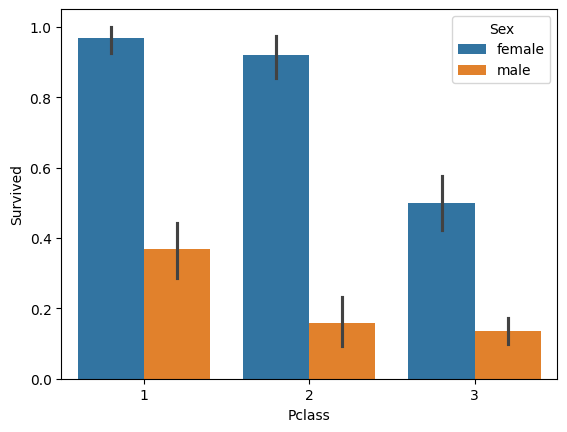

In [ ]:
# Seaborn barplot을 사용하여 승객 클래스별·성별 생존률 시각화
# x축: 'Pclass' 컬럼 (1,2,3) (좌석 등급)
# y축: 'Survived' 컬럼 (0=사망, 1=생존)
# hue: 'Sex' 컬럼 → 막대 색상으로 성별 구분
# data: 시각화할 DataFrame
# 각 막대 높이 = 해당 클래스·성별 승객의 생존률 평균
sns.barplot(
    x='Pclass',    # x축: 승객 클래스
    y='Survived',  # y축: 생존 여부 평균(생존률)
    hue='Sex',     # 성별에 따라 막대 색상 구분
    data=titanic_df
)


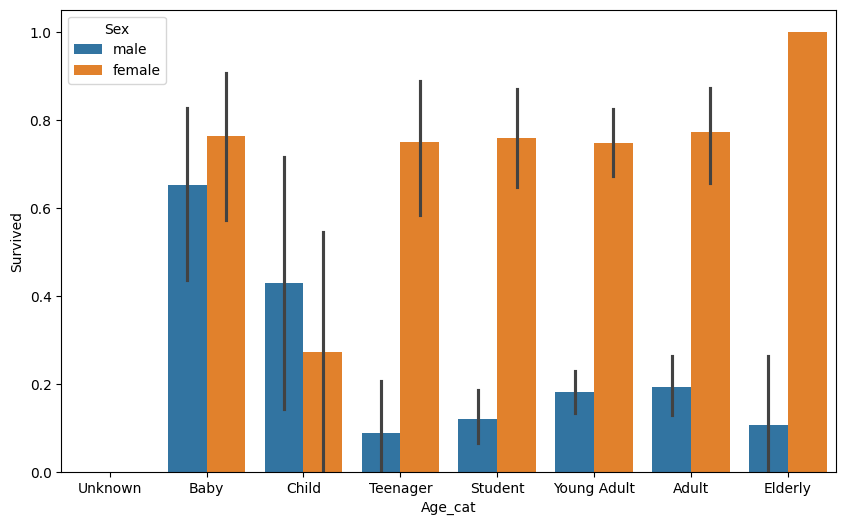

In [25]:
# ==========================================
# 나이에 따라 범주(category)를 반환하는 함수 정의
# DataFrame의 apply()와 lambda 함수에서 사용
# ==========================================
def get_category(age):
    """
    나이를 입력하면 해당하는 범주 문자열을 반환
    - age <= -1      : 'Unknown' (음수 또는 결측치 처리)
    - 0~5            : 'Baby'
    - 6~12           : 'Child'
    - 13~18          : 'Teenager'
    - 19~25          : 'Student'
    - 26~35          : 'Young Adult'
    - 36~60          : 'Adult'
    - 61 이상        : 'Elderly'
    """
    cat = ''  # 결과를 담을 변수 초기화
    if age <= -1:
        cat = 'Unknown'
    elif age <= 5:
        cat = 'Baby'
    elif age <= 12:
        cat = 'Child'
    elif age <= 18:
        cat = 'Teenager'
    elif age <= 25:
        cat = 'Student'
    elif age <= 35:
        cat = 'Young Adult'
    elif age <= 60:
        cat = 'Adult'
    else:
        cat = 'Elderly'
    
    return cat  # 나이 범주 문자열 반환

# ==========================================
# 그래프 크기 설정
# ==========================================
plt.figure(figsize=(10,6))  # 가로 10, 세로 6으로 설정 → 그래프가 충분히 크게 표시됨

# ==========================================
# X축 범주 순서를 미리 지정
# ==========================================
group_names = ['Unknown', 'Baby', 'Child', 'Teenager', 'Student', 'Young Adult', 'Adult', 'Elderly']
# order 파라미터로 사용 → 막대가 나이 순서대로 표시되도록

# ==========================================
# DataFrame에 Age_cat 컬럼 생성
# ==========================================
# lambda 함수 사용 → 각 나이값을 get_category 함수에 넣어 범주 반환
titanic_df['Age_cat'] = titanic_df['Age'].apply(lambda x: get_category(x))
# 결과: Age_cat 컬럼에 'Baby', 'Child', ... 'Elderly' 등 문자열 저장

# ==========================================
# 나이대별·성별 생존률 막대그래프 생성
# ==========================================
sns.barplot(
    x='Age_cat',       # X축: 나이 범주
    y='Survived',      # Y축: 생존 여부 평균 → 생존률
    hue='Sex',         # 성별에 따라 막대 색상 구분
    data=titanic_df,   # 시각화할 DataFrame
    order=group_names  # X축 범주 순서 지정
)

# ==========================================
# 시각화 후 임시 컬럼 삭제
# ==========================================
titanic_df.drop('Age_cat', axis=1, inplace=True)
# axis=1 → 컬럼 삭제, inplace=True → 원본 DataFrame 반영


In [26]:
# ==========================================
# Scikit-learn의 LabelEncoder를 사용하여 범주형 변수를 숫자로 변환
# ==========================================
from sklearn import preprocessing  # 데이터 전처리용 라이브러리 불러오기

# ==========================================
# 범주형 컬럼을 숫자로 변환하는 함수 정의
# ==========================================
def encode_features(dataDF):
    """
    입력: DataFrame
    출력: Label Encoding이 적용된 DataFrame
    
    변환 대상 컬럼: 'Cabin', 'Sex', 'Embarked'
    - LabelEncoder 사용 → 각 범주를 0,1,2,... 등의 숫자로 변환
    """
    features = ['Cabin', 'Sex', 'Embarked']  # 변환할 컬럼 리스트
    
    # 각 컬럼에 대해 반복
    for feature in features:
        le = preprocessing.LabelEncoder()       # LabelEncoder 객체 생성
        le = le.fit(dataDF[feature])           # 컬럼 데이터 학습 → 각 범주를 숫자와 매핑
        dataDF[feature] = le.transform(dataDF[feature])  
        # transform() → 학습한 매핑에 따라 범주를 숫자로 변환
        # 결과를 원본 DataFrame 컬럼에 덮어씀
    
    return dataDF  # 숫자로 변환된 DataFrame 반환

# ==========================================
# 함수 호출하여 titanic_df 범주형 컬럼 변환
# ==========================================
titanic_df = encode_features(titanic_df)

# ==========================================
# 변환 후 상위 5행 확인
# ==========================================
titanic_df.head()
# - 'Cabin', 'Sex', 'Embarked' 컬럼이 숫자로 변환됨
# - 분석 및 모델 학습에 바로 사용 가능

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [ ]:
from sklearn.preprocessing import LabelEncoder  # 범주형 데이터를 숫자로 변환하기 위한 라이브러리

# ==========================================
# 1️⃣ 결측치(Null) 처리 함수
# ==========================================
def fillna(df):
    """
    DataFrame의 결측치를 처리
    - Age      : 평균값으로 대체
    - Cabin    : 'N'으로 대체 (None/Unknown 의미)
    - Embarked : 'N'으로 대체 (탑승항구 알 수 없음)
    - Fare     : 0으로 대체
    """
    df['Age'].fillna(df['Age'].mean(), inplace=True)  # 나이 평균으로 결측치 채우기
    df['Cabin'].fillna('N', inplace=True)            # Cabin 결측치 'N'으로 채우기
    df['Embarked'].fillna('N', inplace=True)         # Embarked 결측치 'N'으로 채우기
    df['Fare'].fillna(0, inplace=True)               # Fare 결측치 0으로 채우기

    # # Age 결측치 처리
    # df['Age'] = df['Age'].fillna(df['Age'].mean())
    # # Cabin 결측치 처리
    # df['Cabin'] = df['Cabin'].fillna('N')
    # # Embarked 결측치 처리
    # df['Embarked'] = df['Embarked'].fillna('N')
    # # Fare 결측치 처리
    # df['Fare'] = df['Fare'].fillna(0)

    return df

# ==========================================
# 2️⃣ 머신러닝 학습에 불필요한 컬럼 제거
# ==========================================
def drop_features(df):
    """
    모델 학습에 필요 없는 컬럼 제거
    - PassengerId : 고유 식별자, 의미 없는 값
    - Name        : 문자열, 모델 학습에 필요 없음
    - Ticket      : 문자열, 모델 학습에 필요 없음
    """
    df.drop(['PassengerId', 'Name', 'Ticket'], axis=1, inplace=True)
    return df

# ==========================================
# 3️⃣ 범주형 컬럼 Label Encoding 수행
# ==========================================
def format_features(df):
    """
    - Cabin 컬럼은 첫 글자만 추출 (예: 'C123' → 'C')
    - 'Cabin', 'Sex', 'Embarked' 컬럼을 숫자로 변환
    """
    df['Cabin'] = df['Cabin'].str[:1]  # Cabin 첫 글자만 추출
    features = ['Cabin', 'Sex', 'Embarked']  # Label Encoding 대상 컬럼
    for feature in features:
        le = LabelEncoder()          # LabelEncoder 객체 생성
        le = le.fit(df[feature])    # 컬럼 데이터 학습 → 범주와 숫자 매핑
        df[feature] = le.transform(df[feature])  # 범주를 숫자로 변환 후 저장
    return df

# ==========================================
# 4️⃣ 전체 전처리 함수: 결측치 처리 + 불필요 컬럼 제거 + 범주형 숫자 변환
# ==========================================
def transform_features(df):
    """
    1. 결측치 처리 (fillna)
    2. 불필요한 컬럼 제거 (drop_features)
    3. 범주형 컬럼 Label Encoding (format_features)
    """
    df = fillna(df)
    df = drop_features(df)
    df = format_features(df)
    return df


In [30]:
# ==========================================
# 1️⃣ 원본 Titanic 데이터를 다시 불러오기
# ==========================================
titanic_df = pd.read_csv('./titanic_train.csv')
# - CSV 파일을 DataFrame으로 읽어옴
# - 학습용 데이터 초기 상태로 재로딩

# ==========================================
# 2️⃣ 레이블(Label) 데이터셋 추출
# ==========================================
y_titanic_df = titanic_df['Survived']
# - 'Survived' 컬럼이 정답 레이블
# - 머신러닝 모델 학습 시 목표값(y)으로 사용

# ==========================================
# 3️⃣ 특징(Feature) 데이터셋 추출
# ==========================================
X_titanic_df = titanic_df.drop('Survived', axis=1)
# - 'Survived' 컬럼을 제외한 나머지 컬럼을 특징(features)으로 사용
# - axis=1 → 컬럼 기준 삭제

# ==========================================
# 4️⃣ 데이터 전처리 함수(transform_features) 적용
# ==========================================
X_titanic_df = transform_features(X_titanic_df)
# - 결측치 처리(fillna)
# - 불필요 컬럼 제거(drop_features)
# - 범주형 컬럼 Label Encoding(format_features)
# - 결과: 머신러닝 모델 학습에 바로 사용 가능한 숫자형 feature 데이터


/tmp/ipykernel_9974/140260468.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Age'].fillna(df['Age'].mean(), inplace=True)  # 나이 평균으로 결측치 채우기
/tmp/ipykernel_9974/140260468.py:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, i

In [ ]:
# ==========================================
# 1️⃣ scikit-learn의 train_test_split 함수 사용
# ==========================================
from sklearn.model_selection import train_test_split
# - 머신러닝 모델 학습용 데이터와 평가용 데이터를 나누는 함수
# - 입력 : feature(X), label(y)
# - 출력 : X_train, X_test, y_train, y_test

# ==========================================
# 2️⃣ 데이터셋 분리
# ==========================================
X_train, X_test, y_train, y_test = train_test_split(
    X_titanic_df,      # 특징(feature) 데이터
    y_titanic_df,      # 레이블(label) 데이터
    test_size=0.2,     # 전체 데이터 중 20%를 테스트용으로 사용
    random_state=11    # 랜덤 시드 고정 → 재실행해도 같은 분할 결과
)


In [ ]:
# ==========================================
# 1️⃣ 필요한 라이브러리 불러오기
# ==========================================
from sklearn.tree import DecisionTreeClassifier       # 결정트리 모델
from sklearn.ensemble import RandomForestClassifier   # 랜덤 포레스트 모델
from sklearn.linear_model import LogisticRegression   # 로지스틱 회귀 모델
from sklearn.metrics import accuracy_score            # 모델 정확도 평가

# ==========================================
# 2️⃣ 사이킷런 Classifier 객체 생성
# ==========================================
dt_clf = DecisionTreeClassifier(random_state=11)      # 결정트리
rf_clf = RandomForestClassifier(random_state=11)      # 랜덤 포레스트
lr_clf = LogisticRegression()                         # 로지스틱 회귀

# random_state=11 → 실행할 때마다 동일한 결과를 재현할 수 있도록 시드 고정

# 결정트리와 랜덤포레스트는 랜덤성을 포함하는 알고리즘이에요.

# DecisionTree: 가지를 나눌 때 여러 후보 중 동일한 정보이득을 가진 특성이 있을 때 랜덤으로 선택

# RandomForest: 각 트리를 만들 때 샘플링(부트스트랩)과 특성 선택을 랜덤하게 수행

# 이 랜덤 요소 때문에 같은 데이터를 학습해도 학습 결과(트리 구조, 예측값)가 달라질 수 있음

# random_state=11을 지정하면 난수 시드가 고정 → 실행할 때마다 같은 학습 결과와 예측값 재현 가능

# ==========================================
# 3️⃣ DecisionTreeClassifier 학습/예측/평가
# ==========================================
dt_clf.fit(X_train, y_train)                          # 학습 데이터(X_train, y_train)로 모델 학습
dt_pred = dt_clf.predict(X_test)                     # 테스트 데이터(X_test)로 예측 수행
print('DecisionTreeClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, dt_pred)))
# accuracy_score(y_test, dt_pred)
# → 실제값(y_test)과 예측값(dt_pred)을 비교하여 정확도 계산
# .4f → 소수점 4자리까지 출력

# ==========================================
# 4️⃣ RandomForestClassifier 학습/예측/평가
# ==========================================
rf_clf.fit(X_train, y_train)                          # 학습
rf_pred = rf_clf.predict(X_test)                     # 예측
print('RandomForestClassifier 정확도: {0:.4f}'.format(accuracy_score(y_test, rf_pred)))
# 랜덤 포레스트는 여러 결정트리를 앙상블하여 예측 → 보통 단일 결정트리보다 정확도가 높음

# ==========================================
# 5️⃣ LogisticRegression 학습/예측/평가
# ==========================================
lr_clf.fit(X_train, y_train)                          # 학습
lr_pred = lr_clf.predict(X_test)                     # 예측
print('LogisticRegression 정확도: {0:.4f}'.format(accuracy_score(y_test, lr_pred)))
# 로지스틱 회귀는 선형 모델 기반 → 확률값으로 예측 후 0/1로 변환


DecisionTreeClassifier 정확도: 0.7877
RandomForestClassifier 정확도: 0.8547
LogisticRegression 정확도: 0.8492


/home/codespace/.local/lib/python3.12/site-packages/sklearn/linear_model/_logistic.py:470: ConvergenceWarning: lbfgs failed to converge after 100 iteration(s) (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT

Increase the number of iterations to improve the convergence (max_iter=100).
You might also want to scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [36]:
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
import numpy as np  # 평균 계산용

# ==========================================
# 1️⃣ KFold 교차 검증 함수 정의
# ==========================================
def exec_kfold(clf, folds=5):
    """
    입력:
        clf   : 사이킷런 classifier 객체 (예: DecisionTreeClassifier)
        folds : KFold 교차검증 시 폴드 개수
    출력:
        각 fold별 정확도와 전체 평균 정확도 출력
    """

    # KFold 객체 생성
    # n_splits=folds → 데이터를 folds 개수만큼 나누어 학습/검증 반복
    kfold = KFold(n_splits=folds, shuffle=True, random_state=11)  
    # shuffle=True → 데이터를 섞고 폴드 생성, random_state로 재현 가능
    scores = []  # 각 fold의 정확도를 저장할 리스트

    # KFold 교차 검증 수행
    for iter_count, (train_index, test_index) in enumerate(kfold.split(X_titanic_df)):
        # train_index, test_index → 학습/검증용 데이터의 인덱스 배열

        # 인덱스를 이용해 실제 학습/검증 데이터 추출
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index]

        # Classifier 학습
        clf.fit(X_train, y_train)

        # 검증 데이터에 대한 예측 수행
        predictions = clf.predict(X_test)

        # 정확도 계산
        accuracy = accuracy_score(y_test, predictions)

        # 리스트에 저장
        scores.append(accuracy)

        # 현재 fold 정확도 출력
        print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))     

    # 모든 fold에서의 평균 정확도 계산
    mean_score = np.mean(scores)
    print("평균 정확도: {0:.4f}".format(mean_score)) 

# ==========================================
# 2️⃣ exec_kfold 함수 호출 (DecisionTreeClassifier)
# ==========================================
exec_kfold(dt_clf, folds=5)
# - dt_clf : 학습할 모델 객체
# - folds=5 : 5-fold 교차 검증 수행
# - 출력: 각 fold 정확도 + 평균 정확도

교차 검증 0 정확도: 0.7877
교차 검증 1 정확도: 0.7528
교차 검증 2 정확도: 0.8258
교차 검증 3 정확도: 0.8034
교차 검증 4 정확도: 0.7809
평균 정확도: 0.7901


In [ ]:
from sklearn.model_selection import cross_val_score
import numpy as np

# ==========================================
# 1️⃣ cross_val_score 함수를 사용한 K-Fold 교차 검증
# ==========================================
# cross_val_score는 KFold 교차 검증을 자동으로 수행하고, 각 fold의 평가 점수를 반환
scores = cross_val_score(
    dt_clf,          # 학습할 classifier 객체 (DecisionTreeClassifier)
    X_titanic_df,    # 특징 데이터
    y_titanic_df,    # 레이블 데이터
    cv=5             # KFold 개수 지정 → 5-fold 교차 검증
)
# 결과: 각 fold에서 계산된 정확도(accuracy)를 담은 array 반환
# 예: [0.7988, 0.8135, 0.7809, 0.8202, 0.8101]

# ==========================================
# 2️⃣ 각 fold 정확도 출력
# ==========================================
for iter_count, accuracy in enumerate(scores):
    print("교차 검증 {0} 정확도: {1:.4f}".format(iter_count, accuracy))
# enumerate(scores) → scores 배열을 순회하며 인덱스와 값을 가져옴
# {0:.4f} → 소수점 4자리까지 출력

# ==========================================
# 3️⃣ 전체 fold의 평균 정확도 계산 및 출력
# ==========================================
print("평균 정확도: {0:.4f}".format(np.mean(scores)))
# np.mean(scores) → 5-fold 정확도의 평균 → 모델 안정성 평가


교차 검증 0 정확도: 0.7877
교차 검증 1 정확도: 0.7528
교차 검증 2 정확도: 0.8258
교차 검증 3 정확도: 0.8034
교차 검증 4 정확도: 0.7809
평균 정확도: 0.7901


In [43]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

# ==========================================
# 1️⃣ 탐색할 하이퍼파라미터 후보 정의
# ==========================================
parameters = {
    'max_depth': [2, 3, 5, 10],          # 트리 최대 깊이 후보
    'min_samples_split': [2, 3, 5],      # 내부 노드를 분할하기 위한 최소 샘플 수 후보
    'min_samples_leaf': [1, 5, 8]        # 리프 노드가 가져야 할 최소 샘플 수 후보
}
# → 이 조합들을 모두 시도하며 최적의 성능을 가진 모델 탐색

# ==========================================
# 2️⃣ GridSearchCV 객체 생성
# ==========================================
grid_dclf = GridSearchCV(
    dt_clf,                # 학습할 DecisionTreeClassifier 객체
    param_grid=parameters, # 탐색할 하이퍼파라미터 그리드
    scoring='accuracy',    # 평가 기준: 정확도
    cv=5                   # 5-fold 교차 검증으로 평가
)

# ==========================================
# 3️⃣ GridSearchCV 학습
# ==========================================
grid_dclf.fit(X_train, y_train)
# - 모든 하이퍼파라미터 조합에 대해 5-fold 교차 검증 수행
# - 가장 높은 평균 정확도를 가진 모델 선택

# ==========================================
# 4️⃣ 최적 하이퍼파라미터와 최고 정확도 확인
# ==========================================
print('GridSearchCV 최적 하이퍼 파라미터 :', grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dclf.best_score_))
# - best_params_ : 가장 성능이 좋았던 하이퍼파라미터 조합
# - best_score_  : 교차 검증에서 최고 평균 정확도

# ==========================================
# 5️⃣ 최적 모델(best_estimator_) 추출
# ==========================================
best_dclf = grid_dclf.best_estimator_
# - GridSearchCV에서 최적 하이퍼파라미터로 학습된 DecisionTreeClassifier

# ==========================================
# 6️⃣ 테스트 데이터로 예측 및 정확도 평가
# ==========================================
dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test, dpredictions)
print('테스트 세트에서의 DecisionTreeClassifier 정확도 : {0:.4f}'.format(accuracy))
# - best_estimator_를 사용해 테스트 세트 예측
# - accuracy_score로 실제값(y_test)과 예측값 비교 → 테스트 세트 성능 확인


GridSearchCV 최적 하이퍼 파라미터 : {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서의 DecisionTreeClassifier 정확도 : 0.8715
